# Determination of seismic velocities
is a fundamental step in seismic data processing. One commonly used tool for obtaining seismic velocities is the velocity spectrum. A velocity spectrum consists of a map of coherency of seismic events versus time when various velocities are assumed. 
An expert system for aid in the interpretation of velocity spectra is presented.
The problem is how to find the best path in the graph made up of the velocityspectrum extrema (peaks), where no definite starting and arrival point exists.


with the positions of 12 analys
The profile length is 8 km and the distance between analysis locations is 500 m. 
The maximum dip on the section is less than 10 degrees. 
The geology was described as three zones: 
0 to 1 s with expected interval velocities from 1000 to 3000 m/s, 
1 to 2 s with velocities from 2000 to 5000 m/s, 
after 2 s with velocities from 3000 to 7000 m/s. 


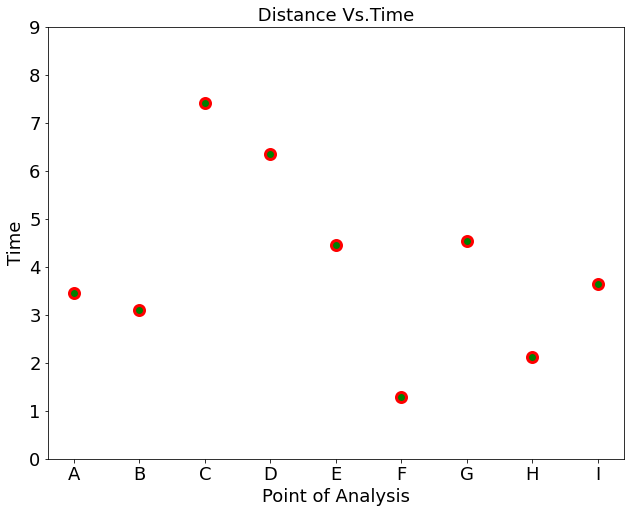

In [2]:
from __future__ import print_function
from pyswip import Prolog, Functor, Variable, call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json 
from  random import uniform
import math as m
import csv 
prolog = Prolog()
g = np.linspace(1, 10, 5)
h = g**2
velocity_spectruim= [uniform(1,9) for p in range(0,9)]
json_str = json.dumps(velocity_spectruim)
resp = json.loads(json_str)
distance=['A','B','C','D','E','F','G','H','I']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
for i in range(9):
   ax.plot(distance[i],resp[i], color='#FF8C00', linewidth=3, linestyle='-.', alpha=1, marker='o', markersize=10, markerfacecolor='green',
        markeredgewidth=3, markeredgecolor='red')
   ax.set_xlabel('Point of Analysis')
   ax.set_ylabel('Time')
   ax.set_title(' Distance Vs.Time ')
#    ax.set_xlim([600, 3600])
   ax.set_ylim([0, 9])
plt.rc('font', size=18)  # Controls default text sizes
plt.rc('axes', titlesize=18)  # Fontsize of the axes title
plt.rc('axes', labelsize=18)  # Fontsize of the x and y labels
plt.rc('xtick', labelsize=18)  # Fontsize of the tick labels
plt.rc('ytick', labelsize=18)  # Fontsize of the tick labels
plt.rc('legend', fontsize=18)  # Legend fontsize
plt.rc('figure', titlesize=18)  # Fontsize of the figure title


# Knowledge Base
When picking velocity spectra the geophyisics seintcist uses "extra knowledge", particularly geological and geophysical knowledge, for the removal of ambiguities The resulting velocity function must be sufficiently smooth and consistent with
the geological and geophysical context. The generating of the search space and its filtering are therefore carried out with heuristics specific to geophysical criteria and adapted to the velocity analysis problem



T 2 (X) = T • (0) + X2/Vs •
where X is the source-to-receiver distance and Vs is the stacking velocity  Under
some assumptions (Dix 1955) velocities in the different layers (interval velocities) can be derived from stacking velocities. The normal moveout, defined
as the difference T(X) - T(O), is approximately proportional to the inverse of
time and the inverse of the square of velocity. Note that T(O), TO, and To are
used interchangeably

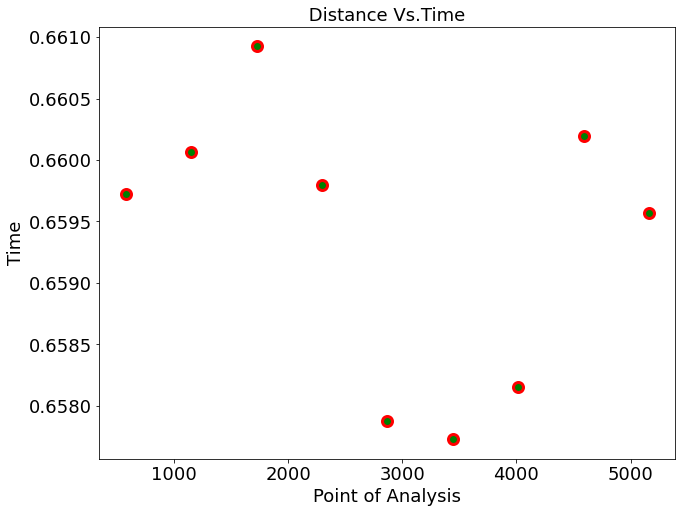

In [67]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

lista = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ch_of_t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
vs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
T_of_x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
NMO = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
d = [500., 1000., 1500., 2000., 2500., 3000., 3500., 4000., 4500., 5000.]
stack = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
st = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# for i in range(0,20):
#     print(np.cos(i)," cos at ",i)
#     print(np.tan(i)," tan at ",i)

    
# field names 
fields = ['PointofAnalysis', 'velocityspectra', 'time', 'changeoftime', 'distance', 'strdistance', 'stackingvelocity','normalmoveout'] 
distance=['A','B','C','D','E','F','G','H','I']

rows=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# data rows of csv file   
filename = "university_records.csv"
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
    # writing the fields 
    csvwriter.writerow(fields) 
    # writing the data rows 
    for i in range(0, 9):
        rows[i] = [ [distance[i], T_of_x[i], t[i], ch_of_t[i],x[i],d[i],vs[i],NMO[i]]]  
        csvwriter.writerows(rows[i])#

for i in range(0, 9):

    t[i] = (500) / ((resp[i]+1000) * np.cos(7))
    a = t[i]
    b = t[i+1]
    x[i] = (500+500*i)/(np.tan(7))
    ch_of_t[i] = (t[i + 1]-t[i])
    if ch_of_t[i] > 0:
      vs[i] = (x[i])/(m.pow((2*t[i])*(ch_of_t[i]), 0.5))
      c = vs[i]
      d = vs[i+1]
      e = ch_of_t[i]
      f = ch_of_t[i+1]
      T_of_x[i] = m.sqrt(
          ((m.pow(t[i], 2)) + (m.pow(x[i], 2)/(m.pow(vs[i], 2)))))

#       print("t of x =",T_of_x[i])
      # The normal moveout, defined as the difference T(X) - T(O),
      NMO[i] = T_of_x[i] - t[i]
    #A pathway is made up of a series of segments connecting two spectrum extrema called peaks
#       print("nmo",NMO[i])

    pointof_analysis = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
    p = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ax.plot(x[i], t[i], color='#FF8C00', linewidth=3, linestyle='-.', alpha=1, marker='o', markersize=10, markerfacecolor='green',
            markeredgewidth=3, markeredgecolor='red')
    ax.set_xlabel('Point of Analysis')
    ax.set_ylabel('Time')
    ax.set_title(' Distance Vs.Time ')
  


        

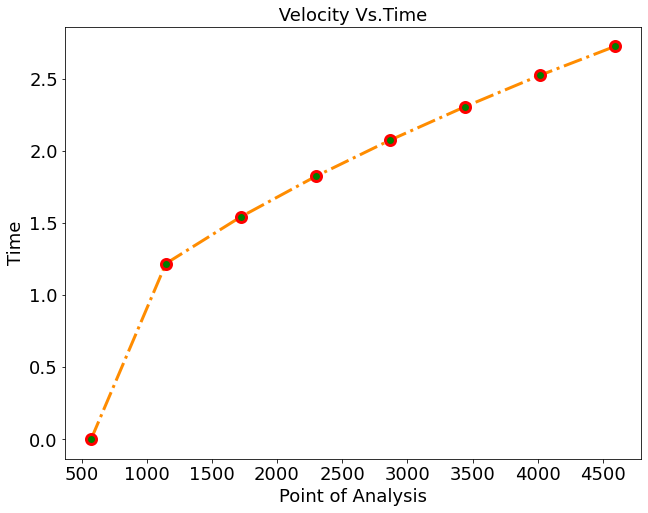

In [68]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

for i in range(0,9):
    if(NMO[i+1]/2<NMO[i]):
#         print("one",NMO[i+1])
      stack[i]=NMO[i+1]
    if(NMO[i+1]/2<NMO[i]):
#         print("tow",NMO[i+1])
     stack[i]=NMO[i+1]    
    if(NMO[i+1]/2<NMO[i]):
#      print("three",NMO[i+1])
     stack[i]=NMO[i+1]       
if(stack[i]>=0):
  ax.plot(x[0:8],stack[0:8], color='#FF8C00', linewidth=3, linestyle='-.', alpha=1, marker='o', markersize=10, markerfacecolor='green',
        markeredgewidth=3, markeredgecolor='red')
  ax.set_xlabel('Point of Analysis')
  ax.set_ylabel('Time')
  ax.set_title(' Velocity Vs.Time ')





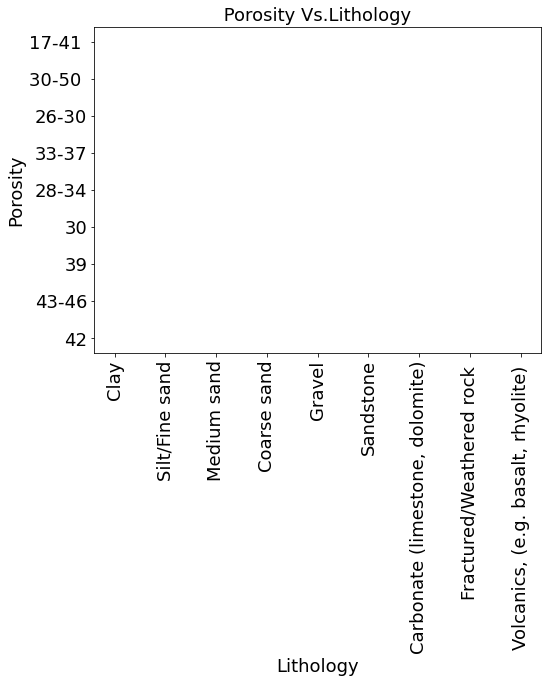

In [16]:
my_data=pd.read_csv('drilling.csv')
# print(my_data)
x= my_data['Lithology']
y= my_data['Porosity']
plt.figure(figsize=(8, 6))
plt.plot(x[0:9],y[0:9],color='#FF8C00', linewidth=3, linestyle='', alpha=1, marker='', markersize=10, markerfacecolor='green',
        markeredgewidth=3, markeredgecolor='red')
plt.xlabel('Lithology')
plt.ylabel('Porosity')
plt.title(' Porosity Vs.Lithology ')
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=90)
plt.show()

